<h2 align='center' style='color:blue'>Exercise: Outlier Detection and Removal Using IQR</h2>

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('height_weight.csv')

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


 Histgram for weights

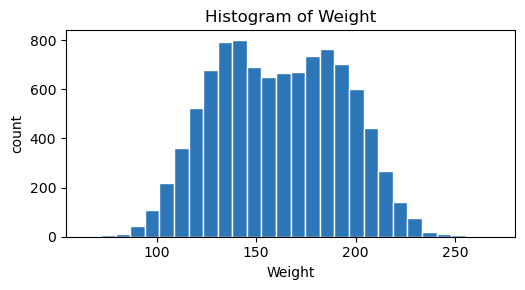

In [42]:
# Plot histograms for height and weight
plt.figure(figsize=(10, 3))


# Histogram for Weight
plt.subplot(1, 2, 1)
plt.hist(data['weight'],  bins=28, color='#2d76b8', edgecolor='white')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('count')

plt.tight_layout()
plt.show()

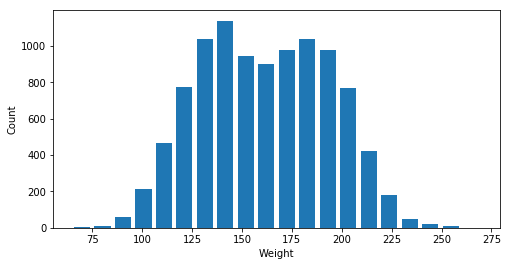

**Histgram for heights**

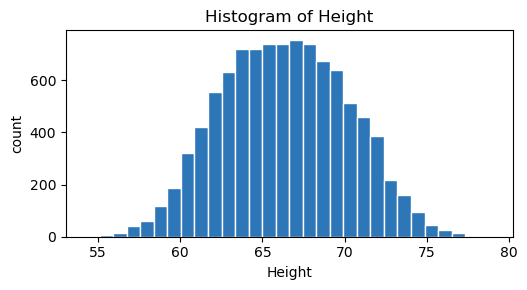

In [40]:
# Plot histograms for height and weight
plt.figure(figsize=(10, 3))

# Histogram for Height
plt.subplot(1, 2, 1)
plt.hist(data['height'], bins=30, color='#2d76b8', edgecolor='white')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('count')

plt.tight_layout()
plt.show()

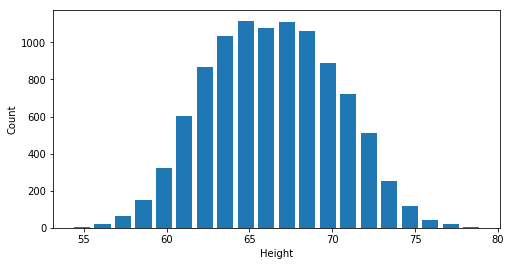

**Detect outliers based on weight, Q1, Q3**

In [61]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for weight
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)

print((Q1,Q3))


(135.8180513055015, 187.16952486868348)


### IQR

In [63]:
IQR = Q3 - Q1
print(IQR)

51.35147356318197


51.35147356318197

### Upperlimit, lowerlimit

In [67]:
# Determine the upper and lower limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print((lower_limit, upper_limit))


(58.79084096072856, 264.19673521345646)


(58.79084096072856, 264.19673521345646)

### Find the outlier records

In [69]:
# Find outlier records based on weight
weight_outliers = data[(data['weight'] < lower_limit) | (data['weight'] > upper_limit)]
print("Weight Outliers:")
print(weight_outliers)

Weight Outliers:
     gender     height      weight
2014   Male  78.998742  269.989699


,gender,height,weight
2014,Male,78.998742,269.989699


**Find the no outlier records**

In [75]:
# Find non-outlier records
no_outliers = data[(data['weight'] >= lower_limit) & (data['weight'] <= upper_limit)]

# Print the non-outlier records
print("\nNon-Outlier Records:")
print(no_outliers)


Non-Outlier Records:
      gender     height      weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9999 rows x 3 columns]
